In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures #多项式特征
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.metrics import mean_squared_error # 均方误差
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 多项式回归

In [6]:
#线性回归算法详解 # https://www.cnblogs.com/mantch/archive/2018/12/18/10135708.html
##### 什么是线性和非线性
###### 线性：两个变量之间的关系是一次函数关系的——图象是直线，叫做线性
###### 非线性：两个变量之间的关系不是一次函数关系的——图象不是直线，叫做非线性
###### 人们在测量事物的时候因为客观条件所限，求得的都是测量值，而不是事物真实的值，为了能够得到真实值，无限次的进行测量，最后通过这些测量数据计算回归到真实值，这就是回归的由来。
###### 通俗的说就是用一个函数去逼近这个真实值，那又有人问了，线性回归不是用来做预测吗？是的，通过大量的数据我们是可以预测到真实值的。
###### 泛化性:

In [4]:
# 兼容 pythone2,3
from __future__ import print_function

# 导入相关python库
import os
import numpy as np
import pandas as pd
#使用matplotlib库画图
import matplotlib
import seaborn
import matplotlib.pyplot as plot
from sklearn import datasets

In [5]:
#设定随机数种子
np.random.seed(36)

In [ ]:
# 读取数据
housing = pd.read_csv('kc_train.csv')
target=pd.read_csv('kc_train2.csv')  # 销售价格
t=pd.read_csv('kc_test.csv')         # 测试数据

In [ ]:
#数据预处理
housing.info()    # 查看是否有缺失值

#特征缩放
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
minmax_scaler.fit(housing)   #进行内部拟合，内部参数会发生变化
scaler_housing=minmax_scaler.transform(housing)
scaler_housing=pd.DataFrame(scaler_housing,columns=housing.columns)

mm=MinMaxScaler()
mm.fit(t)
scaler_t=mm.transform(t)
scaler_t=pd.DataFrame(scaler_t,columns=t.columns)

#选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
LR_reg=LinearRegression()
#进行拟合
LR_reg.fit(scaler_housing,target)

#使用均方误差用于评价模型好坏
from sklearn.metrics import mean_squared_error
preds=LR_reg.predict(scaler_housing)   #输入数据进行预测得到结果
mse=mean_squared_error(preds,target)   #使用均方误差来评价模型好坏，可以输出mse进行查看评价值

#绘图进行比较
plot.figure(figsize=(10,7))       #画布大小
num=100
x=np.arange(1,num+1)              #取100个点进行比较
plot.plot(x,target[:num],label='target')      #目标取值
plot.plot(x,preds[:num],label='preds')        #预测取值
plot.legend(loc='upper right')  #线条显示位置
plot.show()


#输出测试数据
result=LR_reg.predict(scaler_t)
df_result=pd.DataFrame(result)
df_result.to_csv("result.csv")

In [65]:
sample_cnt= 32
data_x = np.linspace(start = 0, stop = sample_cnt/4, num = sample_cnt).reshape(-1, 1)
rand_n = np.random.randn(sample_cnt).reshape(-1, 1)

In [68]:
curve_linear = np.sin(data_x)
θ0, θ1 = 0.3, -0.05
curve_linear = yr = θ0 + θ1 * data_x
curve_linear += rand_n * 0.0

In [74]:
θ0, θ1, θ2, θ3 = 0.1, -0.02, 0.03, -0.04
curve_polynomial = θ0 + θ1*data_x + θ2*(data_x**2) + θ3*(data_x**3)
curve_polynomial += rand_n

Text(0,0.5,'curve_linear(data_x)')

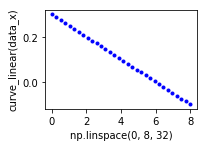

In [75]:
plt.subplot(2, 2, 1)
plt.plot(data_x, curve_linear, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve_linear(data_x)")

Text(0,0.5,'curve_polynomial(data_x)')

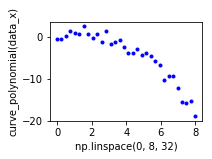

In [76]:
plt.subplot(2, 2, 2)
plt.plot(data_x, curve_polynomial, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve_polynomial(data_x)")

In [77]:
poly_features_1 = PolynomialFeatures(degree = 3)
linear_reg = LinearRegression()
linear_reg.fit(poly_features_1.fit_transform(data_x), curve_linear)
print(poly_features_1.get_params())
fit_x = np.linspace(start = 0, stop = sample_cnt/4, num = 1024).reshape(-1, 1)
fit_linear = linear_reg.predict(poly_features_1.fit_transform(fit_x))

{'degree': 3, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


Text(0,0.5,'curve fitting using Polynomial')

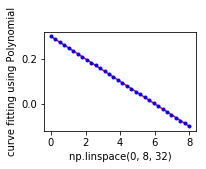

In [78]:
plt.subplot(2, 2, 3)
plt.plot(fit_x, fit_linear, 'r-')
plt.plot(data_x, curve_linear, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve fitting using Polynomial")

In [12]:
housing = pd.read_csv(r'F:\DATEFILE\学习代码\基础算法学习\训练数据\美国King County房价预测训练赛\kc_train.csv',engine='python')
target  = pd.read_csv(r'F:\DATEFILE\学习代码\基础算法学习\训练数据\美国King County房价预测训练赛\kc_test.csv',engine='python')

In [33]:
#特征缩放 ????????????
minmax_scaler=MinMaxScaler()
minmax_scaler.fit(housing)   #进行内部拟合，内部参数会发生变化
scaler_housing=minmax_scaler.transform(housing)
scaler_housing=pd.DataFrame(scaler_housing,columns=housing.columns)

In [34]:
train_data = np.array(housing[['销售日期','卧室数量', '浴室数量', '房屋面积', '停车面积', '楼层数', '房屋评分', '建筑面积',
       '地下室面积', '建筑年份', '修复年份', '纬度', '经度']])
train_target = np.array(housing[['销售价格']])

In [35]:
X_train,X_test, y_train, y_test =train_test_split(train_data,train_target,test_size=0.3, random_state=0)

In [43]:
scaler_housing.shape

(10000, 14)

In [61]:
#选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
LR_reg=LinearRegression()
#进行拟合
LR_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### 数理统计中均方误差是指参数估计值与参数真值之差平方的期望值，
记为MSE。MSE是衡量“平均误差”的一种较方便的方法，M
SE可以评价数据的变化程度，MSE的值越小，说明预测模型描述实验数据具有更好的精确度

In [60]:
from sklearn.metrics import mean_squared_error
preds=LR_reg.predict(X_test)   #输入数据进行预测得到结果
mse = mean_squared_error(y_test,preds)   #使用均方误差来评价模型好坏，可以输出mse进行查看评价值
mse
# preds

45977434348.22343

In [42]:
# pd.DataFrame(preds)

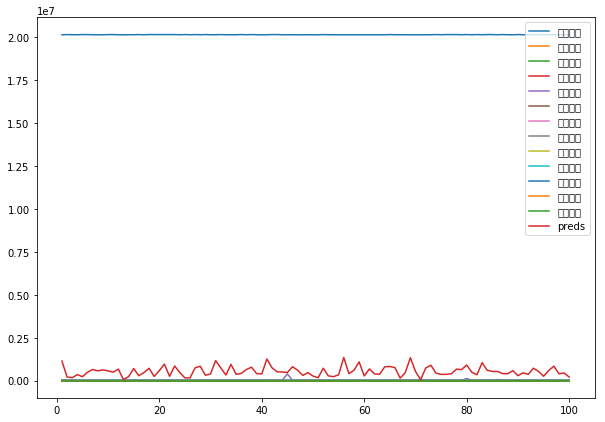

In [62]:
#绘图进行比较
plt.figure(figsize=(10,7))       #画布大小
num=100
x=np.arange(1,num+1)              #取100个点进行比较
plt.plot(x,target[:num],label='销售价格')      #目标取值
plt.plot(x,preds[:num],label='preds')        #预测取值
plt.legend(loc='upper right')  # 线条显示位置
plt.show()

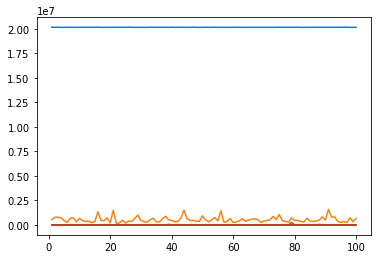

In [77]:
plt.plot(x,target[:num],label='销售价格')      #目标取值
plt.show()

In [ ]:
plt.plot(x,target[:num],label='target')      #目标取值
plt.plot(x,preds[:num],label='preds')        #预测取值
plt.legend(loc='upper right')  #线条显示位置
plt.show()

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 13 columns):
20140502    2999 non-null int64
2           2999 non-null int64
1           2999 non-null float64
880         2999 non-null int64
6380        2999 non-null int64
1.1         2999 non-null float64
7           2999 non-null int64
880.1       2999 non-null int64
0           2999 non-null int64
1938        2999 non-null int64
1994        2999 non-null int64
47.6924     2999 non-null float64
-122.322    2999 non-null float64
dtypes: float64(4), int64(9)
memory usage: 304.7 KB


Text(0,0.5,'curve_polynomial(data_x)')

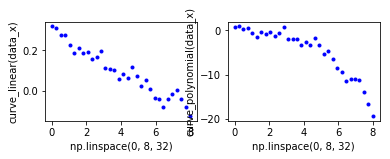

In [21]:
sample_cnt= 32

data_x = np.linspace(start = 0, stop = sample_cnt/4, num = sample_cnt).reshape(-1, 1)
rand_n = np.random.randn(sample_cnt).reshape(-1, 1)

# curve using linear
curve_linear = np.sin(data_x)
θ0, θ1 = 0.3, -0.05
curve_linear = yr = θ0 + θ1*data_x
curve_linear += rand_n * 0.03

# curve using polynomial
θ0, θ1, θ2, θ3 = 0.1, -0.02, 0.03, -0.04
curve_polynomial = θ0 + θ1*data_x + θ2*(data_x**2) + θ3*(data_x**3)
curve_polynomial += rand_n

plt.subplot(2, 2, 1)
plt.plot(data_x, curve_linear, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve_linear(data_x)")

plt.subplot(2, 2, 2)
plt.plot(data_x, curve_polynomial, 'b.')
plt.xlabel("np.linspace(0, 8, 32)")
plt.ylabel("curve_polynomial(data_x)")

In [ ]:
date_f = pd.read_excel
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)
